In [141]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


In [142]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4



file_path = '/kaggle/input/titanic/train.csv'

titanic_data = pd.read_csv('/kaggle/input/titanic/train.csv')

titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [143]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')

train.describe(include="all")








,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Nilsson, Miss. Helmina Josefina",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [144]:
print(train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [145]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
552,553,0,3,"O'Brien, Mr. Timothy",male,NaN,0,0,330979,7.8292,NaN,Q
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
411,412,0,3,"Hart, Mr. Henry",male,NaN,0,0,394140,6.8583,NaN,Q
225,226,0,3,"Berglund, Mr. Karl Ivar Sven",male,22.0,0,0,PP 4348,9.3500,NaN,S
594,595,0,2,"Chapman, Mr. John Henry",male,37.0,1,0,SC/AH 29037,26.0000,NaN,S


In [146]:
train.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Nilsson, Miss. Helmina Josefina",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [147]:
print(pd.isnull(train).sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


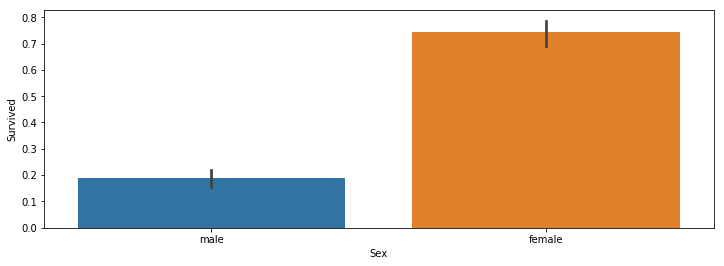

In [148]:
sns.barplot(x="Sex", y="Survived", data=train)

print("Percentage of females who survived:", train["Survived"][train["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

print("Percentage of males who survived:", train["Survived"][train["Sex"] == 'male'].value_counts(normalize = True)[1]*100)


Pclass 1 survival percentage: 62.96296296296296
Pclass 2 survival percentage: 47.28260869565217
Pclass 3 survival percentage: 24.236252545824847


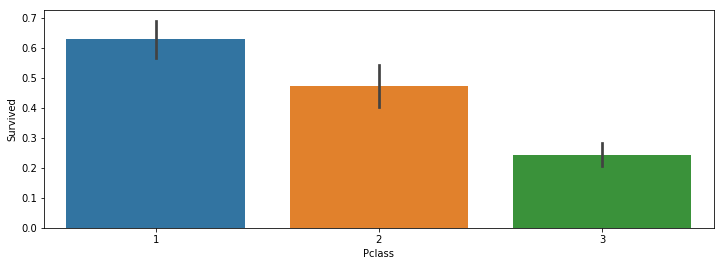

In [149]:
sns.barplot(x ="Pclass", y="Survived", data=train)
print("Pclass 1 survival percentage:",train["Survived"][train["Pclass"] == 1].value_counts(normalize=True)[1]*100)
print("Pclass 2 survival percentage:",train["Survived"][train["Pclass"] == 2].value_counts(normalize=True)[1]*100)
print("Pclass 3 survival percentage:",train["Survived"][train["Pclass"] == 3].value_counts(normalize=True)[1]*100)

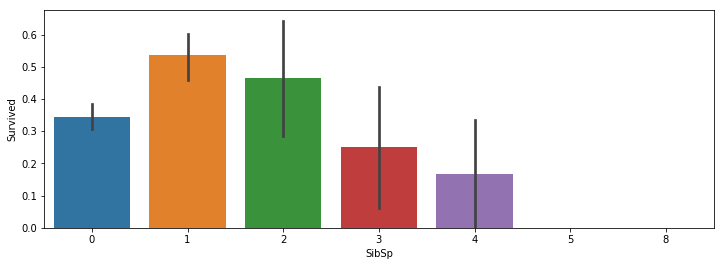

In [150]:
sns.barplot(x="SibSp", y="Survived", data=train)



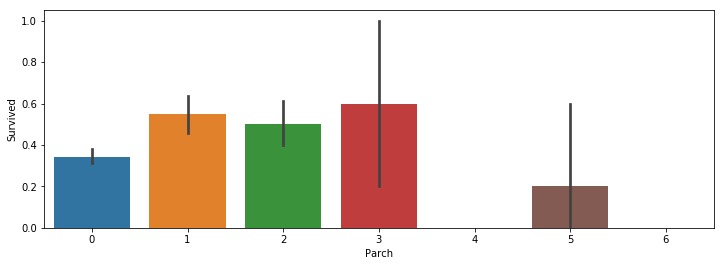

In [151]:
sns.barplot(x="Parch",y="Survived",data=train)
plt.show()

In [152]:
train["Age"] = train["Age"].fillna(-0.5)
test["Age"] = test["Age"].fillna(-0.5)

In [153]:
train = train.drop(["Cabin"], axis =1)
test = test.drop(["Cabin"], axis =1)





In [154]:
train = train.drop(["Ticket"], axis =1)
test = test.drop(["Ticket"], axis =1)

In [155]:
train = train.fillna({"Embarked": "S"})
test = test.fillna({"Embarked": "S"})

train = train.fillna({"Fare": 0})
test = test.fillna({"Fare": 0})

In [156]:
train.sample(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
444,445,1,3,"Johannesen-Bratthammer, Mr. Bernt",male,-0.5,0,0,8.1125,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
187,188,1,1,"Romaine, Mr. Charles Hallace (""Mr C Rolmane"")",male,45.0,0,0,26.5500,S
55,56,1,1,"Woolner, Mr. Hugh",male,-0.5,0,0,35.5000,S
570,571,1,2,"Harris, Mr. George",male,62.0,0,0,10.5000,S
162,163,0,3,"Bengtsson, Mr. John Viktor",male,26.0,0,0,7.7750,S
422,423,0,3,"Zimmerman, Mr. Leo",male,29.0,0,0,7.8750,S
320,321,0,3,"Dennis, Mr. Samuel",male,22.0,0,0,7.2500,S
845,846,0,3,"Abbing, Mr. Anthony",male,42.0,0,0,7.5500,S
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,80.0000,S


In [157]:
sex_mapping = {"male": 0, "female": 1}
train["Sex"] = train["Sex"].map(sex_mapping)
test["Sex"] = test["Sex"].map(sex_mapping)
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S


In [158]:
train = train.drop(["Name"], axis = 1)
test = test.drop(["Name"], axis = 1)



In [159]:
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train["Embarked"] = train["Embarked"].map(embarked_mapping)
test["Embarked"] = test["Embarked"].map(embarked_mapping)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,1
1,2,1,1,1,38.0,1,0,71.2833,2
2,3,1,3,1,26.0,0,0,7.9250,1
3,4,1,1,1,35.0,1,0,53.1000,1
4,5,0,3,0,35.0,0,0,8.0500,1


In [163]:
from sklearn.model_selection import train_test_split

predictors = train.drop(["Survived", "PassengerId"], axis=1)
target = train["Survived"]
test_data = test.drop(["PassengerId"], axis=1)

X_train, X_val, y_train, y_val = train_test_split(predictors, target, random_state = 0)

Model Report

Accuracy Score: 82.51


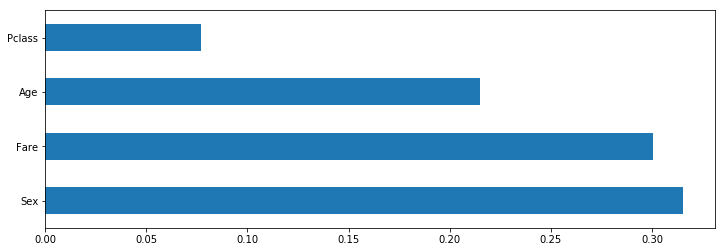

In [192]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train, y_train)
pred = decisiontree.predict(X_val)
acc_decisiontree = round(accuracy_score(pred, y_val) * 100, 2)

print("Model Report")
print("\nAccuracy Score:",acc_decisiontree)

(pd.Series(decisiontree.feature_importances_, index=predictors.columns)
   .nlargest(4)
   .plot(kind='barh'))  





In [172]:
def modelfit(alg, target, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    alg.fit(predictors,target)
    predictions = alg.predict(x_val)
    
    print("Model Report")
    print ("\nAccuracy : %.4g" %accuracy_score(y_val.values,predictions))
    
    xgb.plot_importance(alg)
    plt.title("Feature Importance")
    plt.show()
    


Model Report
Accuracy : 0.8296


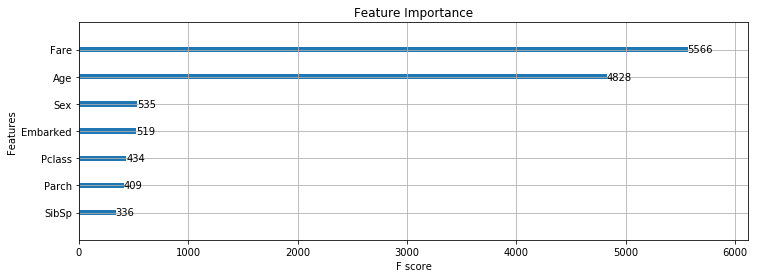

In [173]:
#Choose all predictors except target & IDcols
#predictors = [x for x in train.columns if x not in ['Suvived', 'PassengerId']]
xgb1 =XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 )

modelfit(xgb1,y_train,x_train,useTrainCV=False)

In [171]:
test_pred = decisiontree.predict(test_data)


In [ ]:
ids = test["PassengerId"]
output = pd.DataFrame({'PassengerId': ids, 'Survived': test_pred })
output.to_csv('submission.csv', index=False)
print('File Saved')